In [1]:
!pwd

/home/pi/sous-vide


In [2]:
!which python

/usr/bin/python


In [3]:
!ls /sys/bus/w1/devices/

28-0000057b4685  28-0000075bcfcf  w1_bus_master1


In [1]:
import sys
import time

In [2]:
import RPi.GPIO as GPIO
GPIO.setmode(GPIO.BCM)

In [3]:
RELAY_PIN = 21
GPIO.setup(RELAY_PIN, GPIO.OUT)

/home/pi/miniconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: This channel is already in use, continuing anyway.  Use GPIO.setwarnings(False) to disable warnings.
  from ipykernel import kernelapp as app


In [4]:
DEVICE_ID='28-0000057b4685'
DEVICE_FILE='/sys/bus/w1/devices/%s/w1_slave' % (DEVICE_ID)

In [5]:
DEVICE_ID_rect='28-0000075bcfcf'
DEVICE_FILE_rect='/sys/bus/w1/devices/%s/w1_slave' % (DEVICE_ID_rect)

In [6]:
def read_temp():
    try:
        with open(DEVICE_FILE) as f:
            lines = f.readlines()
        temp = lines[1].split('t=')[1]
        return float(temp) / 1000
    except e:
        return -1

In [ ]:
def read_temp_bottom():
    try:
        with open(DEVICE_FILE_rect) as f:
            lines = f.readlines()
        temp = lines[1].split('t=')[1]
        return float(temp) / 1000
    except e:
        return -1

In [7]:
def turn_heater_on():
    GPIO.output(RELAY_PIN, GPIO.HIGH)

def turn_heater_off():
    GPIO.output(RELAY_PIN, GPIO.LOW)

In [8]:
def get_log_file_name(myEpoc, words=[]):
    t = time.strptime(time.ctime(myEpoc))
    #return time.strftime('%Y%m%d%H%M%S') + '.csv'
    t_string = "{:04d}{:02d}{:02d}{:02d}{:02d}{:02d}".format(t.tm_year,t.tm_mon,t.tm_mday,t.tm_hour,t.tm_min,t.tm_sec)
    if len(words)>0:
        print('hi')
        fname = t_string + '_' + '_'.join(words)

    else:
        print('da')
        fname = t_string
    return fname + '.csv'

In [9]:
read_temp()

25.937

In [10]:
turn_heater_on()

In [11]:
turn_heater_off()

In [12]:
fname = get_log_file_name(time.time())
start_epoc = time.time()

# manual test

In [41]:
sec_elapsed = time.time() - start_epoc
with open(fname, 'a') as f:
    f.write(",".join([str(int(sec_elapsed)),str(read_temp())])+"\n")

while True:
    sec_elapsed = time.time() - start_epoc
    with open(fname, 'a') as f:
        f.write(",".join([str(int(sec_elapsed)),str(read_temp())])+"\n")
    time.sleep(10)

In [16]:
for i in range(10):
    current_temp = read_temp()
    sec_elapsed = time.time() - start_epoc
    with open(fname, 'a') as f:
        f.write(",".join([str(int(sec_elapsed)),str(current_temp)])+"\n")
    print(current_temp)
    time.sleep(3)

27.187
27.187
27.187
27.187
27.187
27.187
27.187
27.187
27.187
27.187


## Got plot update working!!

In [14]:
from matplotlib import pyplot as plt
%matplotlib inline
from IPython import display

[27.875, 27.875, 29.687]


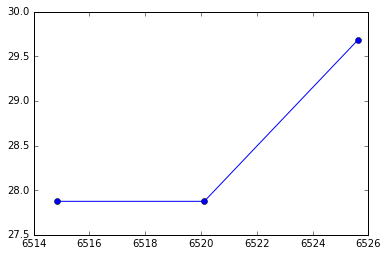

In [81]:
x = []
y = []
fig = plt.figure()
for i in range(3):
    current_temp = read_temp()
    sec_elapsed = time.time() - start_epoc
    with open(fname, 'a') as f:
        f.write(",".join([str(int(sec_elapsed)),str(current_temp)])+"\n")
    x.append(sec_elapsed)
    y.append(current_temp)
    fig.clear()
    ax = fig.add_subplot(111)
    ax.plot(x,y, '-o')
    display.display(fig)
    print(y)
    display.clear_output(wait=True)
    time.sleep(3)
print(y)

# Niku1 control

In [16]:
TARGET_TEMP = 60

x = []
y = []
fig = plt.figure()
while True:
    current_temp = read_temp()
    sec_elapsed = time.time() - start_epoc
    with open(fname, 'a') as f:
        f.write(",".join([str(int(sec_elapsed)),str(current_temp)])+"\n")
    x.append(sec_elapsed)
    y.append(current_temp)
    fig.clear()
    ax = fig.add_subplot(111)
    ax.plot(x,y, '-o')
    display.display(fig)
    print(y)
    display.clear_output(wait=True)
    if current_temp < TARGET_TEMP:
        turn_heater_on()
    else:
        turn_heater_off()
    time.sleep(1)
print(y)

KeyboardInterrupt: 

# PID control

## P

In [15]:
def output(power):
    '''
    powerは0〜1の実数値
    '''
    on = power * 10
    off = (1 - power) * 10
    if on > 0:
        turn_heater_on()
        time.sleep(on)
    if off > 0:
        turn_heater_off()
        time.sleep(off)

In [16]:
def p(temp, target, kp):
    d = target - temp
    if d < 0:
        return 0
    power = d / target * kp
    return power

KeyboardInterrupt: 

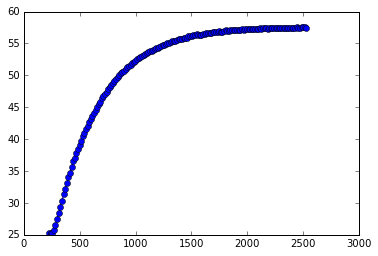

In [17]:
TARGET_TEMP = 60
kp = 1

x = []
y = []
fig = plt.figure()
while True:
    current_temp = read_temp()
    sec_elapsed = time.time() - start_epoc
    power = p(current_temp, TARGET_TEMP, kp)
    output(power)
    with open(fname, 'a') as f:
        f.write(",".join([str(int(sec_elapsed)),str(current_temp),str(power)])+"\n")
    x.append(sec_elapsed)
    y.append(current_temp)
    fig.clear()
    ax = fig.add_subplot(111)
    ax.plot(x,y, '-o')
    display.display(fig)
    print(y)
    display.clear_output(wait=True)
print(y)